In [2]:
#Kütüphanelerimizi içe aktaralım.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Modelimizi uygulayacağımız veriyi pandas dataframe olarak alalım.
df = pd.read_csv('Mall_Customers.csv')

In [4]:
#Verimizi inceleyelim.
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isnull().any()

CustomerID            False
Genre                 False
Age                   False
Annual_Income_(k$)    False
Spending_Score        False
dtype: bool

In [15]:
#Modelimizde kullanacağımız verileri ayarlayalım.
X = df.iloc[:, [2, 3]].values

In [20]:
#Şimdi modelimizi oluşturalım ve en iyi K değerini bulmak için elbow methodunu kullanalım.
from sklearn.cluster import KMeans
k_values = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    k_values.append(kmeans.inertia_) #inertia K değerinin ne kadar iyi olduğunu ölçer.

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'WCSS')

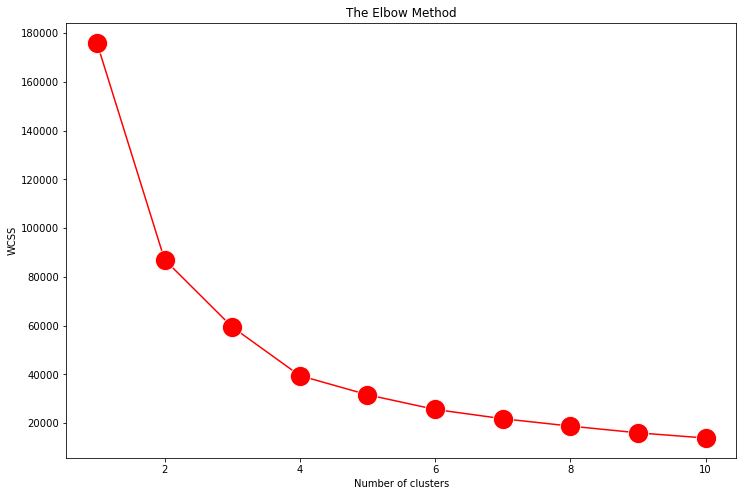

In [22]:
plt.figure(figsize=(12,8))
sns.lineplot(range(1,11),k_values,marker='o',color='red',markersize=20)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [23]:
#Dirsek noktamız olan 5'i alalım ve modelimizi tekrar eğitelim.

In [25]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)
pred = kmeans.fit_predict(X)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: Futu

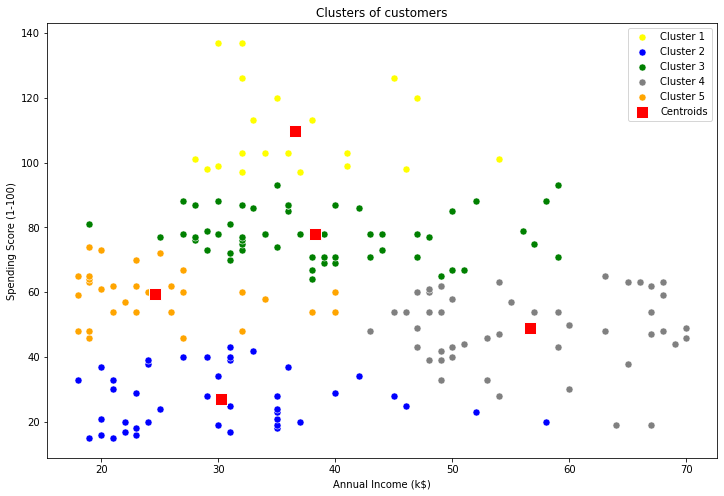

In [38]:
#Clusterları görselleştirelim.
plt.figure(figsize=(12,8))
sns.scatterplot(X[pred == 0, 0], X[pred == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[pred == 1, 0], X[pred == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[pred == 2, 0], X[pred == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[pred == 3, 0], X[pred == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[pred == 4, 0], X[pred == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=150,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()